In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def Drop_col(df,Porcentaje):
    #Calculo de % de missing values
    porcentajes_col = df.isnull().sum().sort_values(ascending=False) / len(df)
    #Columnas con más del 80% de missing values
    columnas_drop = porcentajes_col[porcentajes_col > Porcentaje].index
    #drop de las columnas
    df2 = df.drop(columnas_drop, axis =1)
    return df2, porcentajes_col
    
def Inputation_val(columna):
    #Retorna la moda de la columna si la moda está más cerca a la mediana, en caso contraio retorna la media
    return [columna.mode()[0],"moda"] if abs(columna.median()-columna.mode()[0]) < abs(columna.median()-columna.mean()) else [columna.mean(),"Media"]

def Inputation(df):
    lista_Cat = []
    df2, porcentajes_col = Drop_col(df,0.4)
    for i in porcentajes_col.index:
        if df2[i].dtypes == 'float64' or df2[i].dtypes == "int64":
            #inputacion de la columna numérica
            df2[i].fillna(Inputation_val(df2[i])[0],inplace = True)
            print(i," ",Inputation_val(df2[i])[1])
        if df2[i].dtypes == "O":
            lista_Cat.append(i)
    return df2

In [2]:
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv",sep=",")
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


In [3]:
(df.isnull().sum()/len(df))*100

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.638033
PM10       2.047684
SO2        2.666553
NO2        2.917522
CO         5.065024
O3         4.902464
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64

In [4]:
df2 = Inputation(df)

CO   Media
O3   Media
NO2   Media
SO2   moda
PM2.5   moda
PM10   Media
PRES   Media
RAIN   moda
DEWP   Media
TEMP   Media
WSPM   moda
No   Media
year   Media
hour   Media
day   Media
month   Media


In [5]:
df2.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

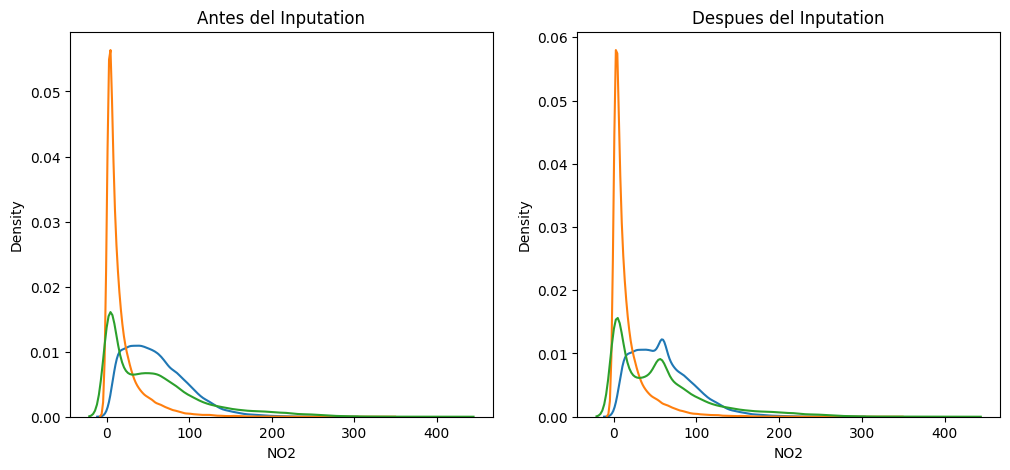

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Antes
ax2.set_title('Despues del Inputation')
sns.kdeplot(df2['NO2'], ax=ax2)
sns.kdeplot(df2['SO2'], ax=ax2)
sns.kdeplot(df2['O3'], ax=ax2)

# Despues
ax1.set_title('Antes del Inputation')
sns.kdeplot(df['NO2'], ax=ax1)
sns.kdeplot(df['SO2'], ax=ax1)
sns.kdeplot(df['O3'], ax=ax1)
plt.show()